In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/building_1.csv", sep=';')

In [3]:
df.head()

,Date and time,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW)
0,08/09/2021 12:15:00,20,20,NaN,"8,68"
1,08/09/2021 12:30:00,NaN,NaN,NaN,"7,985222222222223"
2,08/09/2021 12:45:00,NaN,NaN,NaN,"14,233111111111096"
3,08/09/2021 13:00:00,NaN,NaN,NaN,"14,099999999999985"
4,08/09/2021 13:15:00,NaN,NaN,NaN,"14,099999999999985"


In [4]:
df['Internal temperature area 1 (Celsius degree)'] = df['Internal temperature area 1 (Celsius degree)'].str.replace(',', '.').astype(float)
df['Internal temperature area 2 (Celsius degree)'] = df['Internal temperature area 2 (Celsius degree)'].str.replace(',', '.').astype(float)
df['HVAC power (kW)'] = df['HVAC power (kW)'].str.replace(',', '.').astype(float)
df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].str.replace(',', '.').astype(float)

In [5]:
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
df.describe()

,Date and time,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW)
count,41399,40071.000000,40153.000000,36113.000000,41079.000000
mean,2022-04-12 06:07:10.879973120,23.068509,23.478553,15.286614,2.640936
min,2021-09-08 12:15:00,11.000000,11.000000,-3.220000,0.000000
25%,2021-12-25 08:52:30,21.500000,22.000000,7.355000,0.006889
50%,2022-04-12 06:00:00,22.500000,22.500000,14.470000,1.962889
75%,2022-07-29 03:37:30,24.666667,25.500000,22.630000,4.251778
max,2022-11-14 00:00:00,31.000000,31.000000,37.350000,22.040000
std,NaN,3.289987,3.208501,9.253919,3.153309


In [7]:
print(df.dtypes)

Date and time                                   datetime64[ns]
Internal temperature area 1 (Celsius degree)           float64
Internal temperature area 2 (Celsius degree)           float64
External temperature (Celsius degree)                  float64
HVAC power (kW)                                        float64
dtype: object


In [8]:
df.head()

,Date and time,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW)
0,2021-09-08 12:15:00,20.0,20.0,NaN,8.680000
1,2021-09-08 12:30:00,NaN,NaN,NaN,7.985222
2,2021-09-08 12:45:00,NaN,NaN,NaN,14.233111
3,2021-09-08 13:00:00,NaN,NaN,NaN,14.100000
4,2021-09-08 13:15:00,NaN,NaN,NaN,14.100000


In [9]:
def get_null_info(df):
  """
  This function provides detailed information about null values in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
      A dictionary containing information about null values for each column.
  """
  null_info = {}
  for col in df.columns:
    null_count = df[col].isnull().sum()
    null_perc = null_count / len(df) * 100
    consecutive_nulls = df[col].isnull().cumsum().max()  # Max consecutive nulls
    null_info[col] = {'Count': null_count, 'Percentage': null_perc, 'Consecutive Nulls': consecutive_nulls}
  return null_info

In [10]:
null_value_info = get_null_info(df.copy())
print(null_value_info)

{'Date and time': {'Count': 0, 'Percentage': 0.0, 'Consecutive Nulls': 0}, 'Internal temperature area 1 (Celsius degree)': {'Count': 1328, 'Percentage': 3.2078069518587404, 'Consecutive Nulls': 1328}, 'Internal temperature area 2 (Celsius degree)': {'Count': 1246, 'Percentage': 3.0097345346505953, 'Consecutive Nulls': 1246}, 'External temperature (Celsius degree)': {'Count': 5286, 'Percentage': 12.768424358076283, 'Consecutive Nulls': 5286}, 'HVAC power (kW)': {'Count': 320, 'Percentage': 0.7729655305683713, 'Consecutive Nulls': 320}}


In [11]:
import matplotlib.pyplot as plt


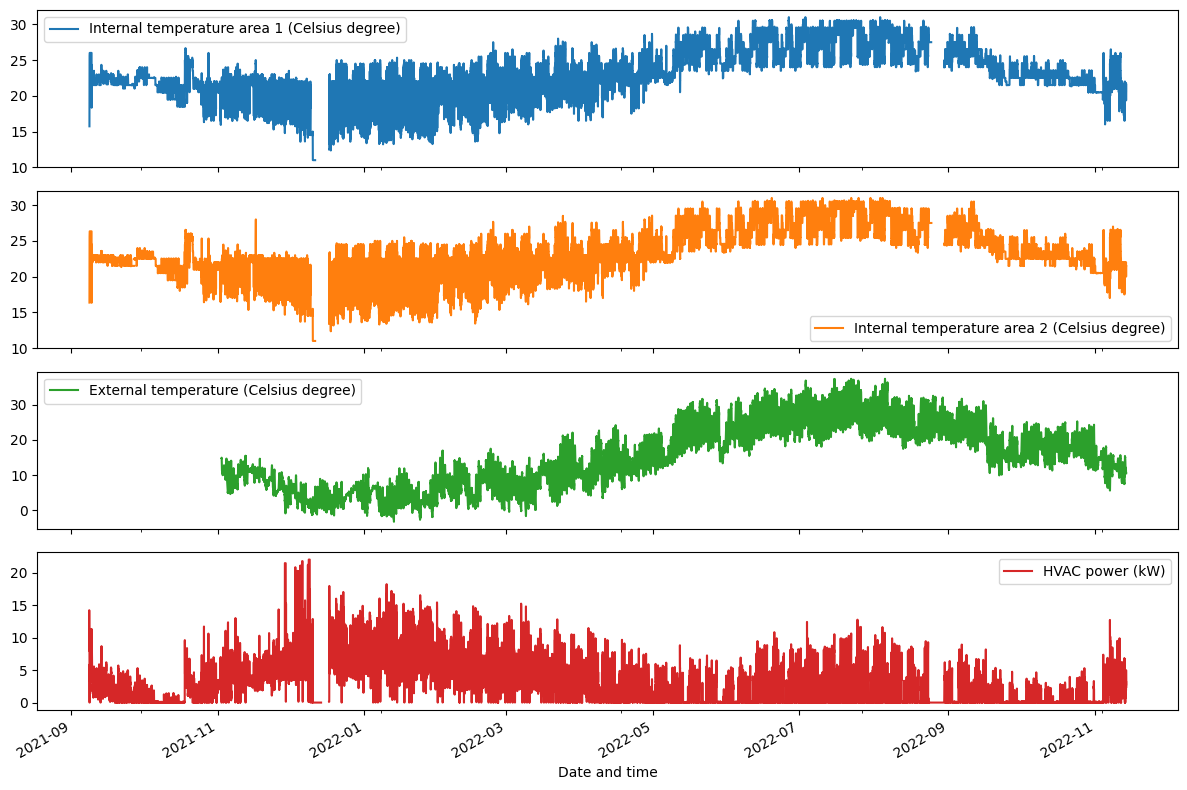

In [12]:
df.set_index('Date and time', inplace=True)

# Plot the last 4 columns
df.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

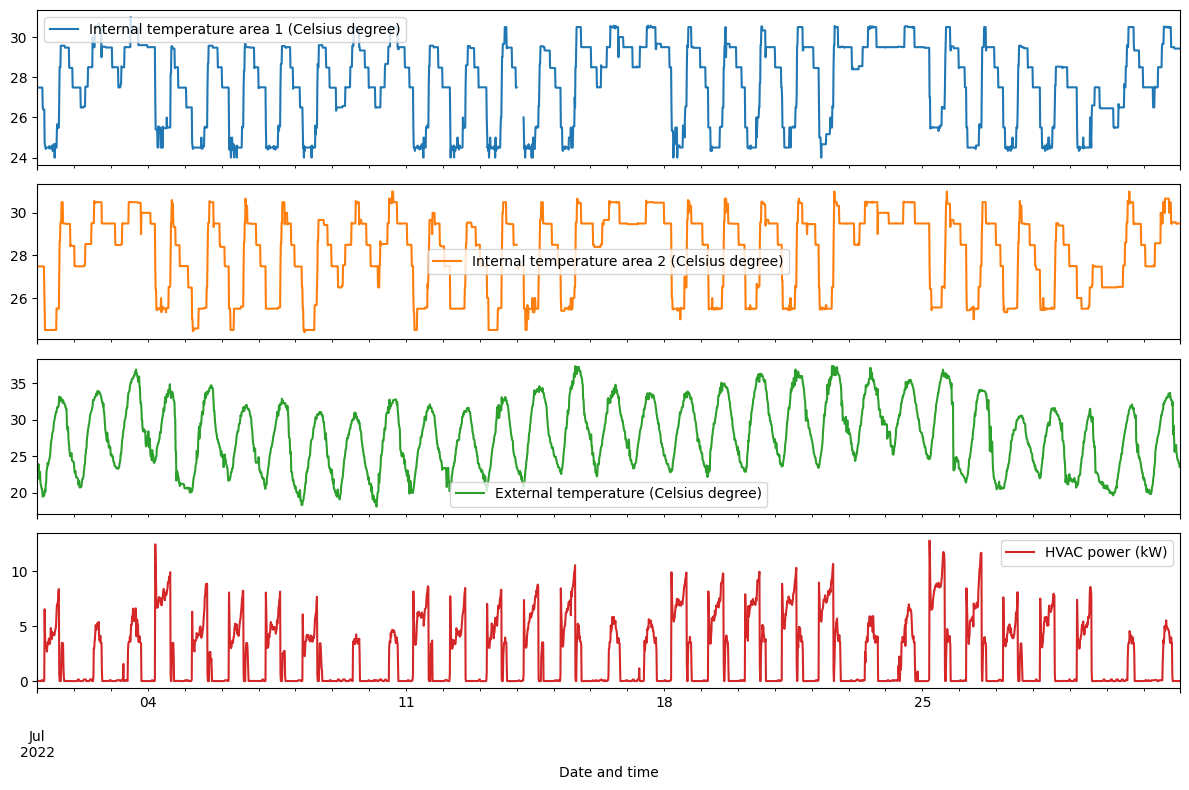

In [23]:
target_month = 7  # October

# Filter data for the specified month
df_month = df[df.index.month == target_month]

# Plot the data for the specified month
df_month.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

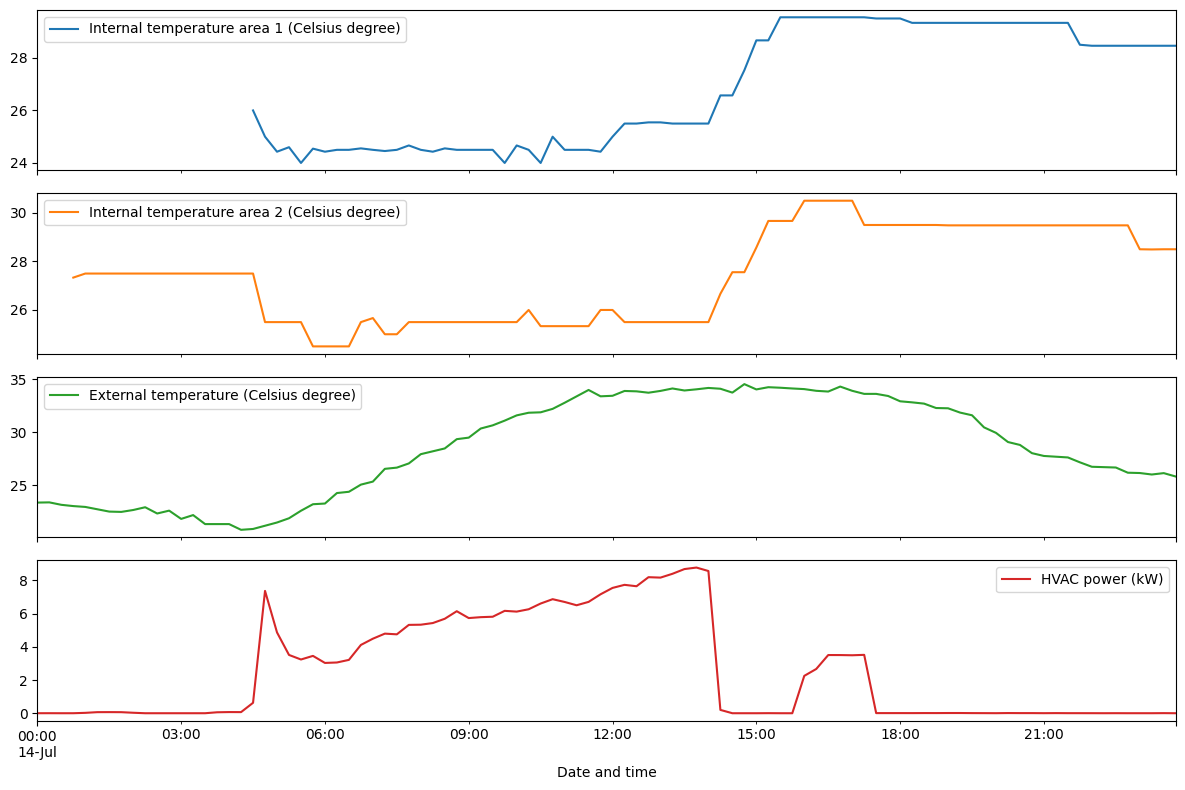

In [24]:
# Specify the desired day
target_day = '2022-07-14'  # Replace with your desired date

# Filter data for the specified day
df_day = df[df.index.date == pd.to_datetime(target_day).date()]

# Plot the data for the specified day
df_day.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()